In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pip install folium

In [3]:
! pip install kaggle


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download kartik2112/fraud-detection -f fraudTrain.csv

fraudTrain.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! kaggle datasets download kartik2112/fraud-detection -f fraudTest.csv

fraudTest.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
! unzip fraudTrain.csv


Archive:  fraudTrain.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  fraudTrain.csv.zip
replace fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraudTrain.csv          


In [10]:
! unzip fraudTest.csv

Archive:  fraudTest.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  fraudTest.csv.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraudTest.csv           


In [11]:
#Reading two data sets and combining them into single data frame
df1 = pd.read_csv('fraudTrain.csv')
df1 = df1.drop(df1.columns[0], axis=1)


df2 = pd.read_csv('fraudTest.csv')
df2 = df2.drop(df2.columns[0], axis=1)

df = pd.concat([df1,df2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# EDA

In [12]:
df.shape

(1852394, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [14]:
#Checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [16]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 1852394, dtype: bool

In [17]:
df.duplicated().sum()

0

In [18]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


In [19]:
#Finiding unique values in each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [20]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [21]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [22]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [23]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']


0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [24]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday


In [25]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

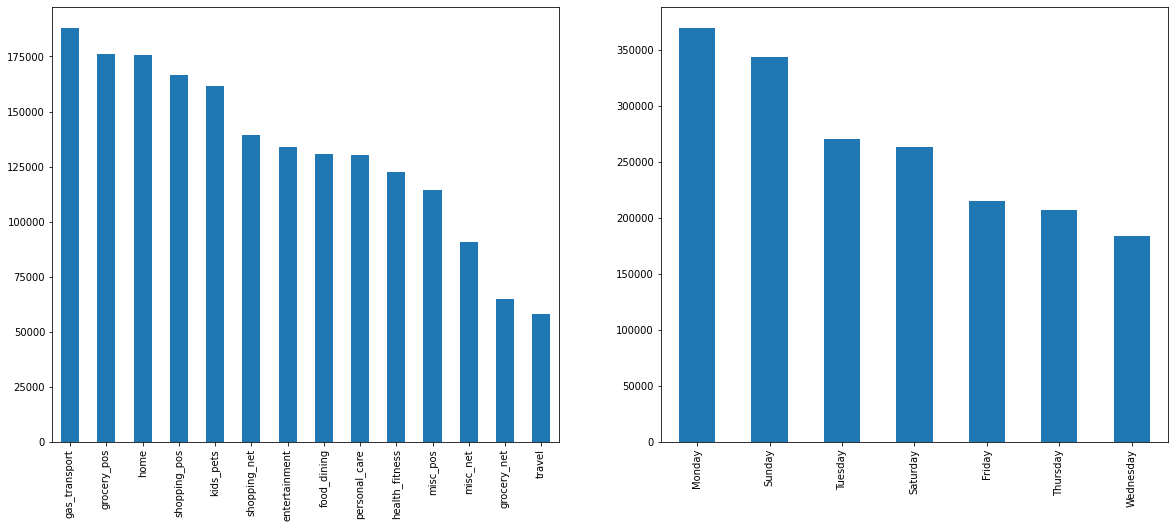

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

In [27]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


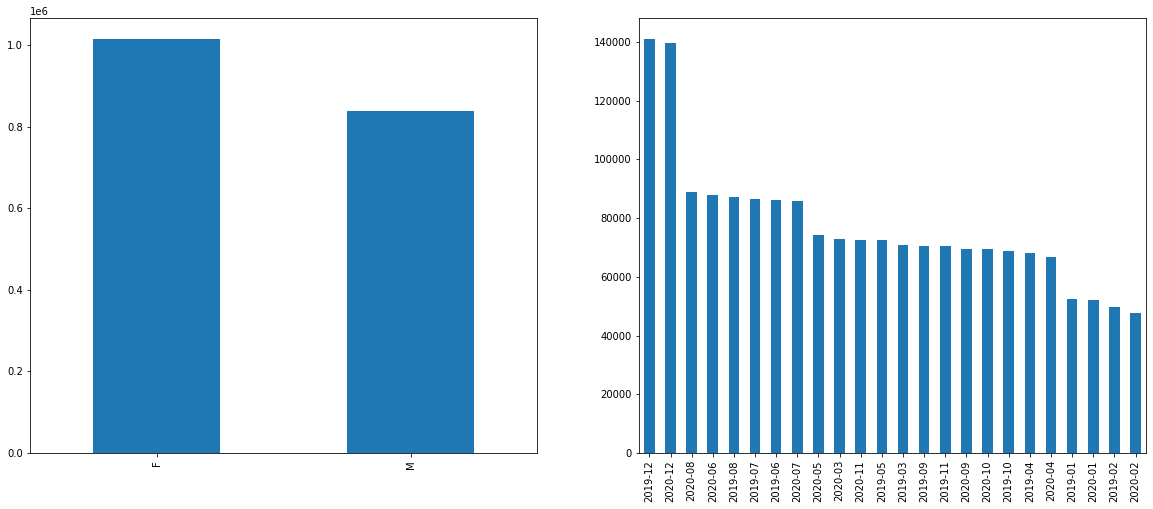

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();

In [29]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


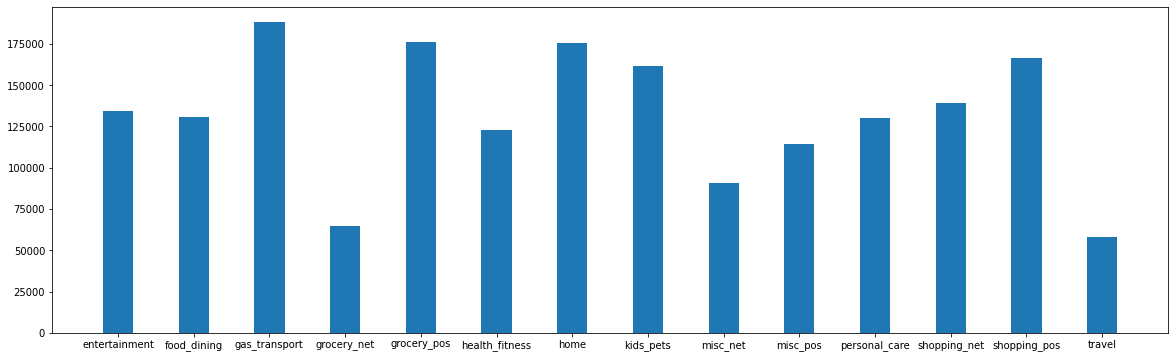

In [30]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'],   
        width = 0.4)

plt.show()

In [31]:
# import folium package
import folium
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
temp = df[df['trans_date_trans_time']==max(df['trans_date_trans_time'])]
m = folium.Map(location=[0,0],tiles='cartodbpositron',min_zoom=1,max_zoom=4,
 zoom_start=1)
for i in range(0,len(temp)):
 folium.Circle(location=[temp.iloc[i]['lat'],temp.iloc[i]['long']],
 color='crimson',fill='crimson',
 tooltip = '<li><bold> city: '+str(temp.iloc[i]['city']) +
 '<li><bold> street: '+str(temp.iloc[i]['street']) +
 '<li><bold> state: '+str(temp.iloc[i]['state']),
 radius = int(temp.iloc[i]['is_fraud'])*0.05).add_to(m)
 display(m)


In [32]:
import plotly.express as px 

df2_fraud = df2[df2['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [33]:
dftemp_fraud = df2[df2['is_fraud'] == 1]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = dftemp_fraud['long'],
        lat = dftemp_fraud['lat'],
        #text = df_sub['text'],
        marker = dict(
            #size = df_sub['total_cases']/scale,
            color = dftemp_fraud['is_fraud'],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'test'))
fig.update_layout( title_text = 'test',
                 geo = dict(
                     landcolor = 'rgb(217,217,217)',),
                  mapbox_style="open-street-map"
                 )

In [34]:
df.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125,-0.000902
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308,-0.024891
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190,0.005947
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904,-0.011259
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022,-0.002082
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325,0.019949
unix_time,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329,0.000571
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778,-0.011119
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999,-0.002120
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.000000,0.013196


In [35]:
x = df['merch_lat']
y = df['lat']
correlation = y.corr(x)
correlation


0.9935817080041682

Text(0, 0.5, 'y axis')

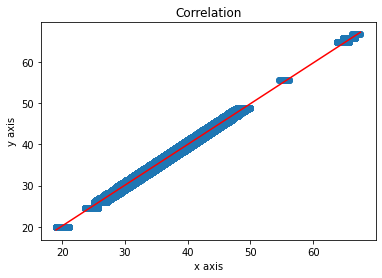

In [36]:
plt.title('Correlation')
plt.scatter(x, y)
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.xlabel('x axis')
plt.ylabel('y axis')

In [37]:
x1 = df['merch_long']
y1 = df['long']
correlation = y1.corr(x1)
correlation


0.9991183248079879

Text(0, 0.5, 'y axis')

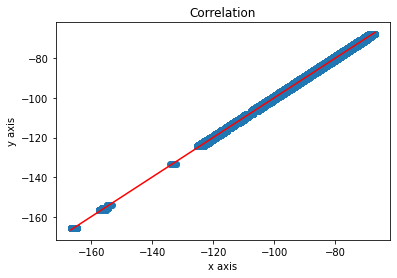

In [38]:
plt.title('Correlation')
plt.scatter(x1, y1)
plt.plot(np.unique(x1),
         np.poly1d(np.polyfit(x1, y1, 1))
         (np.unique(x1)), color='red')

plt.xlabel('x axis')
plt.ylabel('y axis')

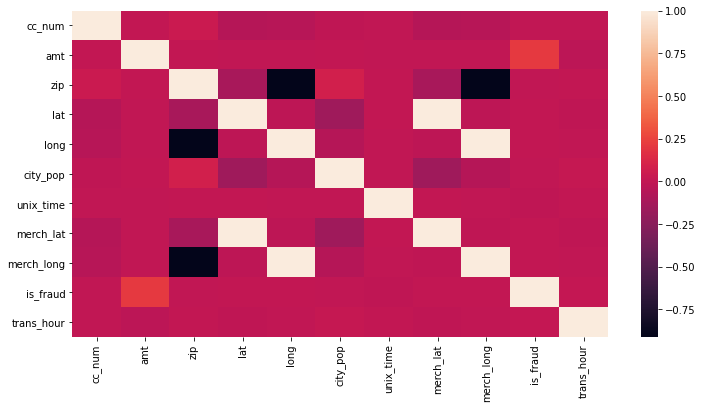

In [39]:
figure = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),data = df)

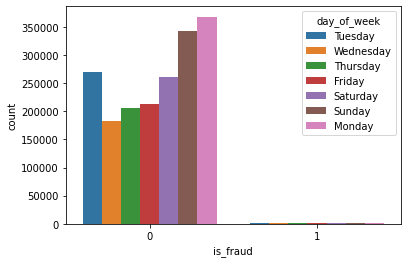

In [40]:
sns.countplot(x = 'is_fraud' , hue = 'day_of_week', data = df)

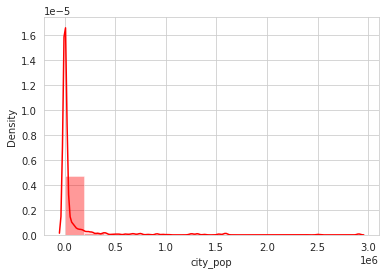

In [41]:
sns.set_style('whitegrid')
sns.distplot(df['city_pop'], color ='red', bins = 15)

In [42]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [43]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [44]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [45]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday'],
      dtype='object')

In [46]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [47]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df1[df1['is_fraud'] == 0]['amt'].count()
df1_class_fraud = df1[df1['is_fraud'] == 1]
df1_class_nonfraud = df1[df1['is_fraud'] == 0]
df1_class_fraud_oversample = df1_class_fraud.sample(cnt_non_fraud, replace=True)
df1_oversampled = pd.concat([df1_class_nonfraud, df1_class_fraud_oversample], axis=0)
df1_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [48]:
#df.set_index(df1_oversampled['trans_date_trans_time'],inplace = True)

In [49]:
df1_oversampled.drop('trans_date_trans_time',1)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-29 23:55:33,4079773899158,fraud_Huel-Langworth,misc_net,965.16,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,ba01001e2dae4d08ac02fae8a32f2bd4,1335743733,44.962783,-116.481540,1,23,Monday,2019-04,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2019-11-26 22:47:19,4926376199189801,fraud_Lynch-Mohr,travel,10.89,Claire,Davis,F,83685 Matthew Center Suite 870,Cherokee Village,AR,72529,36.3011,-91.5281,4726,Pharmacologist,1977-06-07,e3738251149b363eda8521813c3e7912,1353970039,36.329613,-91.299758,1,22,Tuesday,2019-11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2020-05-01 01:25:30,580954173374,fraud_Friesen-Stamm,gas_transport,11.26,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,NY,10548,41.2496,-73.9446,3487,Race relations officer,1960-01-13,e7c1b8cc54fb7150515d23cc84e213e4,1367371530,40.588816,-74.716845,1,1,Friday,2020-05,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
X = df1_oversampled.drop(['is_fraud','trans_date_trans_time','merchant','gender','category','first','last','street','year_month','job','city','state','trans_num','day_of_week','dob'],axis=1) 
y = df1_oversampled['is_fraud'] #target variable

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.7, test_size=0.3, random_state=42)
X_train.shape

(2579840, 30)

In [52]:
X_train.columns
X_train.dtypes


cc_num                       int64
amt                        float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
trans_hour                   int64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
gender_M                     uint8
week_Monday                  uint8
week_Saturday                uint8
week_Sunday                  uint8
week_Thursday                uint8
week_Tuesday        

In [53]:
y_train.dtypes

dtype('int64')

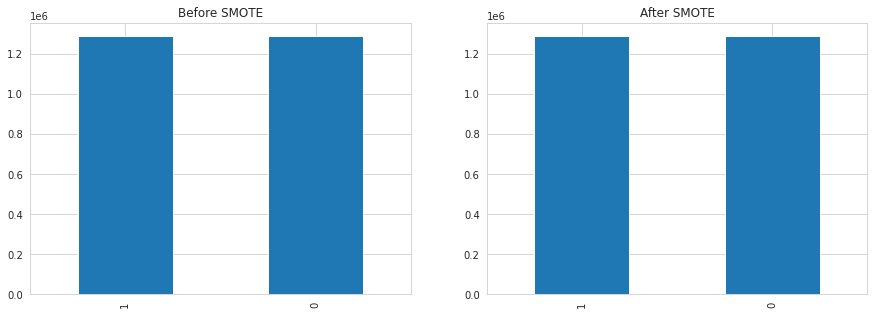

In [54]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [55]:
X_test.shape

(1105646, 30)

In [56]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))

print(accuracy_score(y_train, pred_train))

[[1276597   13314]
 [      0 1289929]]
0.9948392148350286


In [57]:
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(accuracy_score(y_test,pred_test))

[[546686   6146]
 [     0 552814]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    552832
           1       0.99      1.00      0.99    552814

    accuracy                           0.99   1105646
   macro avg       0.99      0.99      0.99   1105646
weighted avg       0.99      0.99      0.99   1105646

0.9944412587754128


In [58]:
#Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,verbose = 1)
rf_clf.fit(X_train, y_train)
pred_train1 = rf_clf.predict(X_train)


print(confusion_matrix(y_train, pred_train1))
print(classification_report(y_train, pred_train1))
print(accuracy_score(y_train,pred_train1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.1s finished


[[1282981    6930]
 [    254 1289675]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289911
           1       0.99      1.00      1.00   1289929

    accuracy                           1.00   2579840
   macro avg       1.00      1.00      1.00   2579840
weighted avg       1.00      1.00      1.00   2579840

0.9972153311833292


In [59]:
pred_test1= rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test1))
print(classification_report(y_test, pred_test1))
print(accuracy_score(y_test,pred_test1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.4s finished


[[549545   3287]
 [   125 552689]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552832
           1       0.99      1.00      1.00    552814

    accuracy                           1.00   1105646
   macro avg       1.00      1.00      1.00   1105646
weighted avg       1.00      1.00      1.00   1105646

0.9969140213051917


In [60]:
import xgboost as xgb
xg_classifier = xgb.XGBClassifier(n_estimators = 30)   #there is also XGBRegressor
xg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
pred_train2 = xg_classifier.predict(X_train)
pred_test2 = xg_classifier.predict(X_test)
print('Training Accuracy',accuracy_score(y_train,pred_train2))
print('Testing Accuracy',accuracy_score(y_test,pred_test2))

Training Accuracy 0.9400005426693129
Testing Accuracy 0.9401028900751235


In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)
accuracy 

0.5000081400375889

In [65]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
pred_train3 = kn_classifier.predict(X_train)
pred_test3 = kn_classifier.predict(X_test)
print('Training Accuracy',accuracy_score(y_train,pred_train3))
print('Testing Accuracy',accuracy_score(y_test,pred_test3))

Training Accuracy 0.9993906598858844
Testing Accuracy 0.999081080201077


In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))
print(accuracy_score(y_test,gnb_pred))

[[ 50307 502525]
 [ 48693 504121]]
              precision    recall  f1-score   support

           0       0.51      0.09      0.15    552832
           1       0.50      0.91      0.65    552814

    accuracy                           0.50   1105646
   macro avg       0.50      0.50      0.40   1105646
weighted avg       0.50      0.50      0.40   1105646

0.5014516400366844
